In [1]:
using PyPlot
using HDF5

In [2]:
datapath = "/home/vit/vyzkum/alfven/cdb_data/data_sample"

"/home/vit/vyzkum/alfven/cdb_data/data_sample"

In [3]:
readdir(datapath)

15-element Array{String,1}:
 "Jldata10000.h5"
 "Jldata10001.h5"
 "Jldata10002.h5"
 "Jldata10003.h5"
 "Jldata10004.h5"
 "Jldata10005.h5"
 "Jldata10006.h5"
 "Jldata10007.h5"
 "Jldata10008.h5"
 "Jldata10009.h5"
 "Jldata10514.h5"
 "Jldata10800.h5"
 "Jldata10866.h5"
 "Jldata10870.h5"
 "Jldata10893.h5"

In [24]:
data = h5read(joinpath(datapath, "Jldata10893.h5"), "/")

Dict{String,Any} with 14 entries:
  "Mirnov_coil_A&C_theta_14_cpsdphase" => [0.0 0.0 … 0.0 0.0; -0.00553555 -0.00…
  "I_plasma"                           => [-2725.37, -2698.25, -2728.76, -2728.…
  "Mirnov_coil_A&C_theta_12_cpsdphase" => [0.0 0.0 … 0.0 3.14159; -0.211552 -0.…
  "Mirnov_coil_A&C_theta_14_coherems"  => [0.993922 0.994543 … 0.952607 0.68123…
  "Mirnov_coil_A&C_theta_13_cpsdphase" => [0.0 0.0 … 0.0 0.0; -0.00594602 -0.01…
  "t_cohere"                           => [0.945103, 0.945207, 0.94531, 0.94541…
  "Uprobe_coil_A1pol_psd"              => [0.000527773 0.000531723 … 0.00050492…
  "Mirnov_coil_A&C_theta_12_coherems"  => [0.146384 0.775 … 0.465489 0.169003; …
  "t_Uprobe"                           => [0.945102, 0.945154, 0.945205, 0.9452…
  "fnoscale"                           => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0…
  "f_Uprobe"                           => [0.0, 4882.81, 9765.63, 14648.4, 1953…
  "t_fnoscale"                         => [945.0, 945.05, 945.1, 945.15, 94

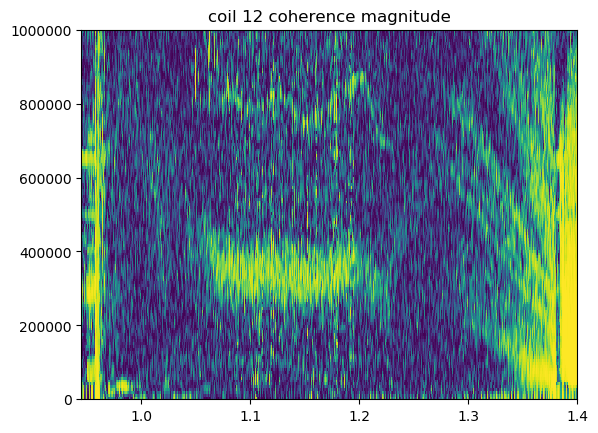

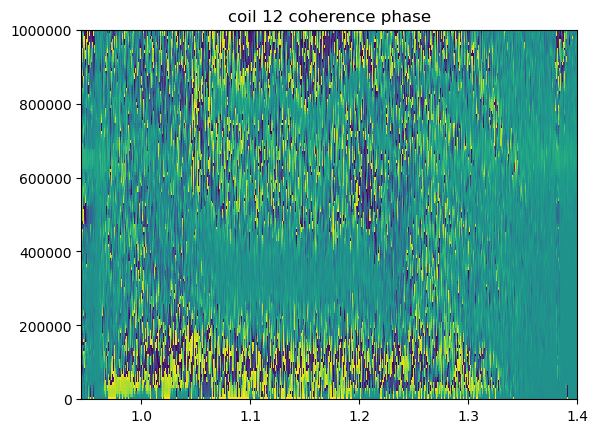

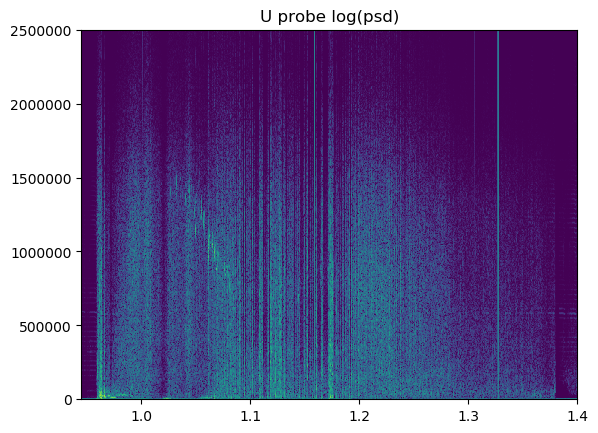

PyObject Text(0.5, 1.0, 'U probe log(psd)')

In [25]:
coil = 12

X = data["Mirnov_coil_A&C_theta_$(coil)_coherems"]
f = data["f_cohere"]
t = data["t_cohere"]
figure()
pcolormesh(t,f,X)
title("coil $coil coherence magnitude")

X = data["Mirnov_coil_A&C_theta_$(coil)_cpsdphase"]
f = data["f_cohere"]
t = data["t_cohere"]
figure()
pcolormesh(t,f,X)
title("coil $coil coherence phase")

X = data["Uprobe_coil_A1pol_psd"]
f = data["f_Uprobe"]
t = data["t_Uprobe"]
figure()
pcolormesh(t,f,20*log10.(X.+1e-6))
title("U probe log(psd)")

In [15]:
data["Uprobe_coil_A1pol_psd"]

513×8883 Array{Float64,2}:
 0.000808502  0.0008235    0.000838332  …  0.000411053  0.000421965
 0.000295587  0.000298534  0.000305805     0.000153593  0.000155045
 8.08495e-9   2.72244e-9   1.66849e-9      2.63961e-8   4.35057e-9 
 2.47272e-9   2.14158e-9   1.07015e-9      2.38569e-8   2.44764e-8 
 2.28547e-11  2.85444e-9   7.95423e-9      1.09713e-8   4.35323e-9 
 3.92686e-10  6.66108e-9   1.12036e-8   …  9.54333e-9   4.43004e-9 
 4.04552e-9   3.82094e-9   1.12588e-9      2.64007e-9   2.17917e-9 
 4.34506e-9   8.15872e-9   5.71213e-9      7.17884e-9   3.15688e-9 
 1.03573e-9   7.32121e-9   9.39917e-10     1.0783e-8    1.96764e-8 
 3.59945e-9   8.12635e-9   9.52671e-9      3.7814e-9    1.32431e-8 
 1.03753e-9   1.20466e-9   1.92659e-9   …  5.04037e-10  1.90743e-9 
 2.13146e-9   2.17013e-9   1.97713e-9      2.36117e-9   7.50904e-11
 6.08745e-9   3.86263e-9   1.5136e-9       5.65528e-9   7.95384e-10
 ⋮                                      ⋱                          
 2.5714e-9    5.25891

In [18]:
data["Mirnov_coil_A&C_theta_14_coherems"]

129×4395 Array{Float64,2}:
 0.702742    0.48685    0.687142     …  0.775715   0.68404    0.0682778  
 0.699908    0.495115   0.689806        0.778982   0.686095   0.0838767  
 0.688581    0.523608   0.697802        0.789763   0.692941   0.135206   
 0.653269    0.585243   0.708837        0.811435   0.70722    0.239592   
 0.503664    0.667511   0.69432         0.84697    0.735857   0.436274   
 0.0103675   0.275253   0.374174     …  0.734295   0.755863   0.49699    
 0.0616927   0.0109306  0.235505        0.191521   0.390578   0.17259    
 0.162089    0.0067432  0.417897        0.206722   0.449511   0.175618   
 0.198367    0.0033214  0.398278        0.375793   0.503099   0.246013   
 0.222054    0.0259406  0.336591        0.523688   0.493298   0.10356    
 0.237727    0.0947636  0.264408     …  0.524115   0.472715   0.150992   
 0.110342    0.135542   0.127073        0.580288   0.527441   0.176381   
 0.00675961  0.0774025  0.0752452       0.686963   0.583678   0.197318   
 ⋮         